# Gradiente: definição

O *operador* gradiente $\nabla$ agrupa as derivadas parciais de uma função $f$ em um vetor. Por exemplo, se $f$ for uma função de duas variáveis ($f(x, y)$ ou algo parecido), o gradiente de $f$ será definido como

$$
\nabla f(x, y) =
\begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\end{bmatrix}.
$$

Note que atribuímos ao gradiente o título de *operador*. Operadores matemáticos são ferramentas que tomam uma função como entrada e geram uma nova função como saída. No caso do gradiente, nós tomamos uma função real como entrada e geramos uma função vetorial como saída. Em outras palavras: a função $f(x, y)$ tomava dois números reais e gerava um terceiro número real ($R^2 \rightarrow R$), enquanto o gradiente $\nabla f(x, y)$ toma dois números reais e gera um vetor de duas coordenadas ($R^2 \rightarrow R^2$).

Intuitivamente, podemos expandir o conceito de operador gradiente para qualquer dimensão. Se $f$ for uma função de 3 variáveis, o seu gradiente será um vetor com 3 derivadas parciais; para uma função de 1000 variáveis, teremos um vetor com 1000 derivadas parciais, e assim sucetivamente.

Em termos de definição não há muito o que dizer sobre o gradiente além disso: agrupamento vetorial das derivadas parciais de uma função. O que há de interessante são algumas de suas propriedades, principalmente quando observamos o significado geométrico desse operador. Tal interpretação ajuda nos ajuda a consolidar um conhecimento importantíssimo em análise de funções: o conceito de campo. Antes de partirmos por esse caminho, vamos ver como calcular o gradiente de uma função de maneira numérico usando a biblioteca numpy.

# `np.gradient`

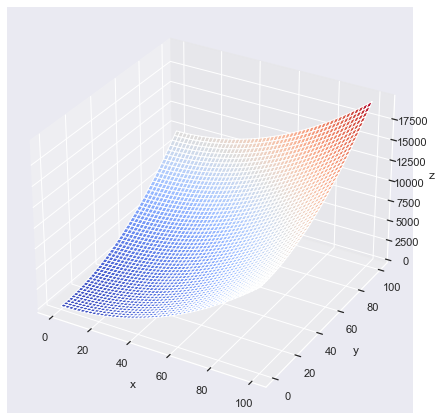

In [19]:
# EXEMPLO?

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

x = np.arange(0, 100, 0.1)
y = np.arange(0, 100, 0.1)
xx, yy = np.meshgrid(x, y)

z = xx**2 + yy**2
g = np.gradient(z)

# Visualização
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot_surface(xx, yy, z, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.tight_layout()
plt.show()

# Campo vetorial

CONTINUAR...

# *"O gradiente sempre aponta para a direção de maior crescimento."*

CONTINUAR...